<a href="https://colab.research.google.com/github/Stormshadow100/Road-accident-severity-analysis/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Road accident severity analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
np.random.seed(42)

num_samples = 1000
data = {
    'speed': np.random.randint(30, 130, num_samples),
    'weather': np.random.choice([1, 2, 3], num_samples),
    'road_condition': np.random.choice([1, 2, 3], num_samples),
    'time_of_day': np.random.choice([1, 2], num_samples),
    'age_of_driver': np.random.randint(18, 80, num_samples),
}
df = pd.DataFrame(data)
df['severity'] = (
    0.3 * df['speed'] +
    2.5 * (df['weather'] == 3) +
    2.0 * (df['road_condition'] == 3) +
    1.5 * (df['time_of_day'] == 2) +
    -0.05 * df['age_of_driver'] +
    np.random.normal(0, 2, num_samples)
).clip(1, 10)
df.head()


,speed,weather,road_condition,time_of_day,age_of_driver,severity
0,81,2,1,2,38,10.000000
1,122,3,2,1,71,10.000000
2,44,1,2,2,28,8.993314
3,101,3,2,2,56,10.000000
4,90,2,2,1,45,10.000000


In [3]:
X = df[['speed', 'weather', 'road_condition', 'time_of_day', 'age_of_driver']]
y = df['severity']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
joblib.dump(model, "accident_severity_model.pkl")


['accident_severity_model.pkl']

In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.15420634388790724
R² Score: -0.02360463496470655


In [8]:
sample_data = np.array([[90, 2, 2, 2, 25]])
prediction = model.predict(sample_data)
print("Predicted Accident Severity:", prediction)


Predicted Accident Severity: [9.98130924]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


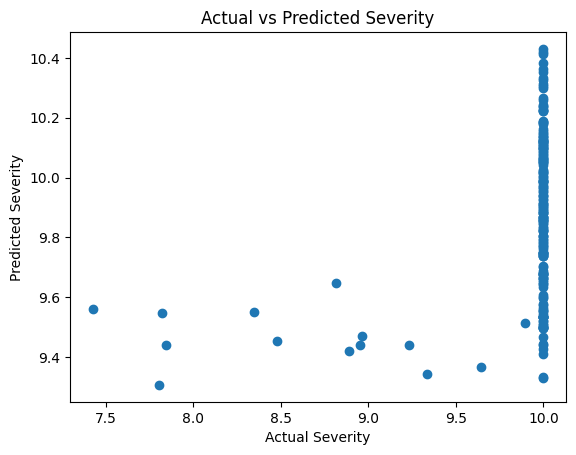

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs Predicted Severity")
plt.show()


### Benefits of This Model for Developing Countries
- **Accident Analysis**: The model helps identify factors that significantly affect accident severity, allowing authorities to understand high-risk scenarios.
- **Resource Allocation**: Resources like traffic patrols and emergency services can be allocated to high-risk areas or times.
- **Prevention Programs**: Insights can guide educational campaigns to raise awareness of specific risks, like night driving and poor road conditions.
